# The relationship between PM2.5 concentration and seasons in Beijing

### Introduction
Due to the rapid industrial development, air pollution has become a big concern. Major metropolitan cities, such as Beijing suffer from this difficulty. Particulate Matter 2.5 (PM2.5) are tiny particles or droplets in the air that are carcinogenic and causes respiratory disease (Zhao et al.). In order to explore the pattern of Beijing PM2.5 concentration, this study will focus on the question: is PM2.5 concentration in Beijing seasonal? The *Beijing PM2.5 Data Data Set* will be used to answer this question. The dataset includes the daily data of PM2.5 concentration, temperature, dew points, pressure, wind conditions, and weather conditions in Beijing from 2010 to 2014. The variable characteristics are either integers or real numbers.


### Preliminary Data Analysis


In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RCurl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:
pm2.5_data <- read_csv("https://raw.githubusercontent.com/gbrwg/DSCI100-Group-Project/main/data/beijing_pm2.5_data.csv") %>%
            filter(year == "2010")
pm2.5_data


Parsed with column specification:
cols(
  No = col_double(),
  year = col_double(),
  month = col_double(),
  day = col_double(),
  hour = col_double(),
  pm2.5 = col_double(),
  DEWP = col_double(),
  TEMP = col_double(),
  PRES = col_double(),
  cbwd = col_character(),
  Iws = col_double(),
  Is = col_double(),
  Ir = col_double()
)



No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,2010,1,1,0,NA,-21,-11,1021,NW,1.79,0,0
2,2010,1,1,1,NA,-21,-12,1020,NW,4.92,0,0
3,2010,1,1,2,NA,-21,-11,1019,NW,6.71,0,0
4,2010,1,1,3,NA,-21,-14,1019,NW,9.84,0,0
5,2010,1,1,4,NA,-20,-12,1018,NW,12.97,0,0
6,2010,1,1,5,NA,-19,-10,1017,NW,16.10,0,0
7,2010,1,1,6,NA,-19,-9,1017,NW,19.23,0,0
8,2010,1,1,7,NA,-19,-9,1017,NW,21.02,0,0
9,2010,1,1,8,NA,-19,-9,1017,NW,24.15,0,0


In [56]:
## Omitting NA, set the seed, and spilting the data
pm2.5_data_withoutna <- na.omit(pm2.5_data)
set.seed(1)
pm2.5_split <- initial_split(pm2.5_data_withoutna, prop = 0.75, strata = pm2.5)
pm2.5_train <- training(pm2.5_split)
pm2.5_test <- testing(pm2.5_split)

In [57]:
## Find the number of rows that contain missing data.
missing_data <- nrow(pm2.5_data) - nrow(pm2.5_data_withoutna)
missing_data

[1] 669

There are 669 rows with missing data.

In [58]:
## Find the mean for each predictor
Pm_2.5_selected <- select(pm2.5_train,DEWP,TEMP,PRES,Iws)

mean_dewp <- Pm_2.5_selected%>%
summarize(mean= mean(DEWP))%>%
pull()

mean_temp <- Pm_2.5_selected%>%
summarize(mean= mean(TEMP))%>%
pull()

mean_pres <- Pm_2.5_selected%>%
summarize(mean= mean(PRES))%>%
pull()

mean_iws <- Pm_2.5_selected%>%
summarize(mean= mean(Iws))%>%
pull()

In [59]:
## Creating the table displaying the mean of each predictor
tab_pm2.5 <- matrix(c(mean_dewp, mean_temp, mean_pres, mean_iws), ncol=4, byrow=TRUE)
colnames(tab_pm2.5) <- c("DEWP (â„ƒ)", "TEMP (â„ƒ)", "PRES (hPa)", "Iws (m/s)")
rownames(tab_pm2.5) <- c("mean")
tab_pm2.5 <- as.table(tab_pm2.5)
tab_pm2.5

      DEWP (â„ƒ)  TEMP (â„ƒ)  PRES (hPa)   Iws (m/s)
mean    1.567216   11.528666 1016.167628   29.505185

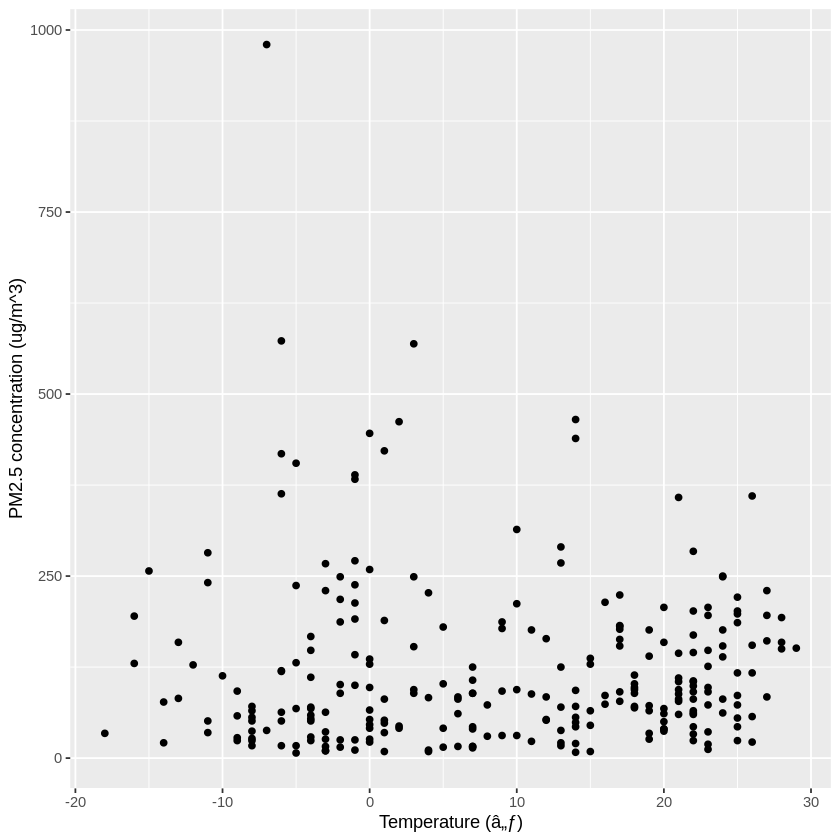

In [60]:
pm2.5_train_reduced <- filter(pm2.5_train, hour == 1)

plotTEMP <- ggplot(pm2.5_train_reduced, aes(x = TEMP, y = pm2.5)) + 
         geom_point() + 
         labs(x = "Temperature (â„ƒ)", y = "PM2.5 concentration (ug/m^3)")

plotTEMP


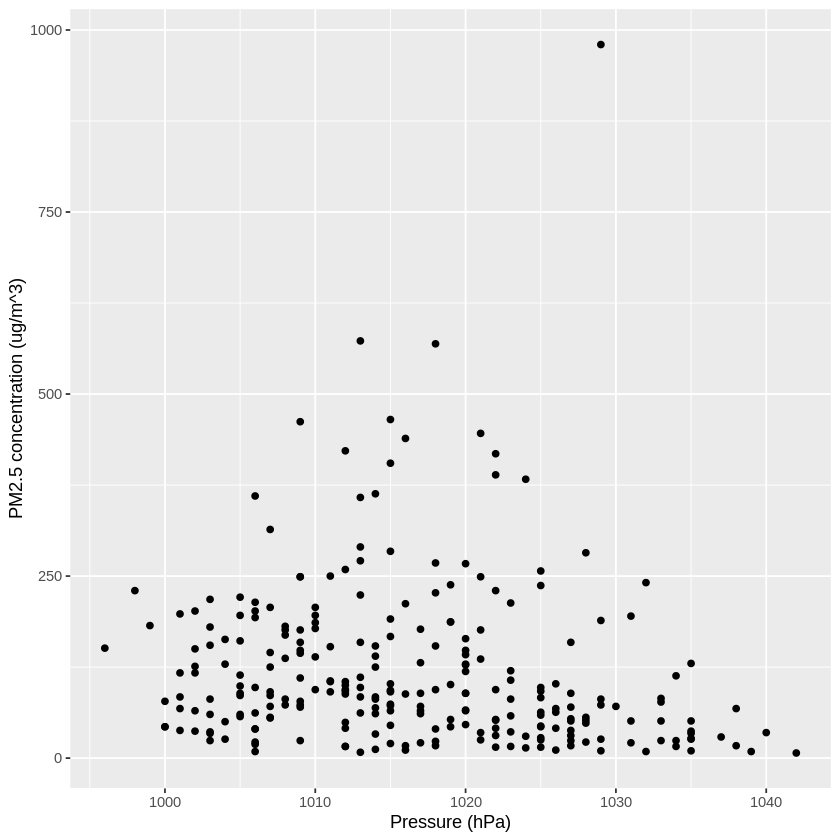

In [61]:
plotPRES <- ggplot(pm2.5_train_reduced, aes(x = PRES, y = pm2.5)) + 
         geom_point() + 
         labs(x = "Pressure (hPa)", y = "PM2.5 concentration (ug/m^3)")
plotPRES

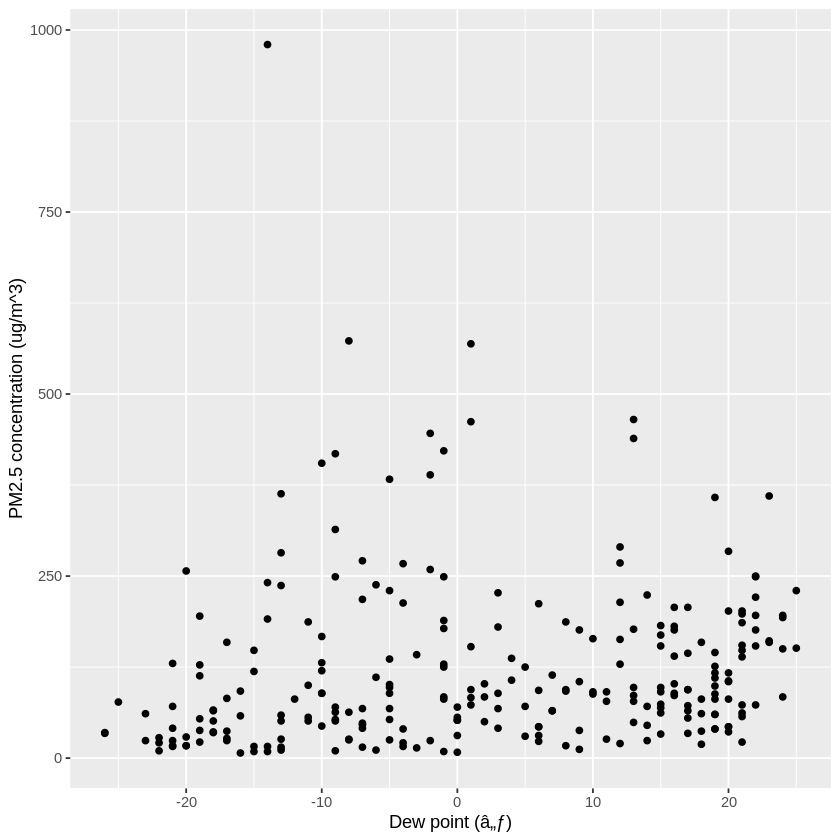

In [62]:
plotDEWP <- ggplot(pm2.5_train_reduced, aes(x = DEWP, y = pm2.5)) + 
         geom_point() + 
         labs(x = "Dew point (â„ƒ)", y = "PM2.5 concentration (ug/m^3)")
plotDEWP

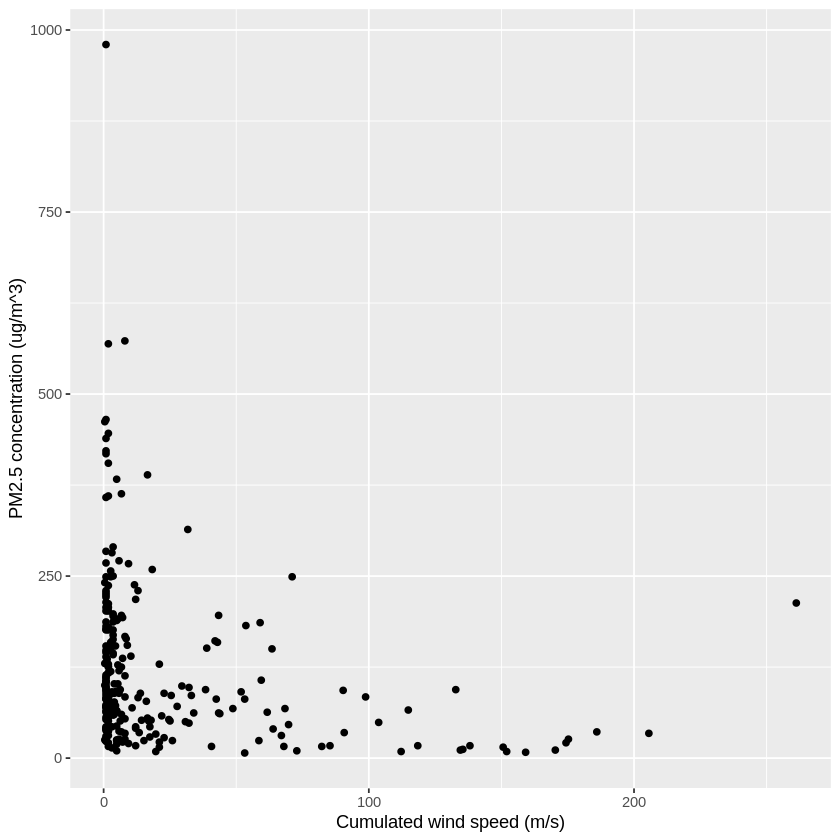

In [63]:
plotlws <- ggplot(pm2.5_train_reduced, aes(x = Iws, y = pm2.5)) + 
         geom_point() + 
         labs(x = "Cumulated wind speed (m/s)", y = "PM2.5 concentration (ug/m^3)")
plotlws

### Methods


We chose to use dew point, temperature, pressure, and cumulated wind speed in the data set as predictors since different weather conditions can change the concentration of PM2.5 particles. It was found that wind speed could influence the concentration of PM2.5, a fixed wind speed and direction was found to be helpful in reducing the concentration of PM2.5 particles in Beijing. (Liang et al.). It was also found that dewpoint increases with PM2.5 concentration and pressure decreases with PM2.5 concentration increases (Liang et al.). Furthermore, data from Nagasaki, Japan suggested that the concentration of PM2.5 increases with temperature. (Wang and Ogawa)

To analyze the data, we first filtered all data from 2010 only since the concentration of PM2.5 increases yearly, thus using data from all years could result in a weaker prediction in PM2.5 concentration. Additionally, we filtered the hour to 1 since PM2.5 can vary by time of day as well, we chose hour 1 because there is less traffic, thus less PM2.5 particles being emitted which can help reduce the variability in data. Then we split the data into training and testing data, and we will use KNN regression model to predict the concentration of PM2.5 and do cross-validation to determine an appropriate K-value. Then we will test the model and create scatterplots for each pair of predictors, then coloring the points according to temperature ranges in each season. This will visually help visualize whether there are higher concentration of PM2.5 in particular seasons. 

### Expected Outcomes and Significance
Air pollution is an increasingly important problem. To overcome it, we must study the patterns and correlations. We hope to find a seasonal pattern in PM2.5 concentration, then we can think of methods to reduce the concentration during peak seasons. From gathering seasonal patterns in PM2.5 concentration, we hope that this can help governments in implementing policies in reducing PM2.5 concentration during peak seasons. Further research could be done by finding the causes of the rise in concentration in PM2.5 and ways to mitigate such effects. 

### References

Liang, Xuan, et al. “Assessing Beijing’s PM 2.5 Pollution: Severity, Weather Impact, APEC and Winter Heating.” Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences, vol. 471, no. 2182, Oct. 2015, https://doi.org/10.1098/rspa.2015.0257.

Wang, Jianhua, and Susumu Ogawa. “Effects of Meteorological Conditions on PM2.5 Concentrations in Nagasaki, Japan.” International Journal of Environmental Research and Public Health, vol. 12, no. 8, Aug. 2015, https://doi.org/10.3390/ijerph120809089.

Zhao, Hui, et al. “Spatiotemporal Distribution of PM2.5 and O3 and Their Interaction during the Summer and Winter Seasons in Beijing, China.” *MDPI*, Multidisciplinary Digital Publishing Institute, 30 Nov. 2018, https://www.mdpi.com/2071-1050/10/12/4519/htm. 